# A Quick Guide to Deep Learning with Python

Kai Zhang, Duke Kunshan University, 2022

# Lecture 1 Linear Regression (Polynomial Regression)




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Generate data from true function

e.g. $y = sin( 2\pi x)$

In [ ]:
def func(x):
  y = np.sin(x*2*math.pi)
  #y = 10*(x-0.1)*(x-0.5)*(x-0.8)
  return y

In [ ]:
m = 100 # number of samples
dy = 0.2 # noise level
X = np.random.rand(m,1) # N inputs uniformly distributed in [0,1]
y = func(X) + dy*(np.random.rand(m,1)-0.5)

Text(0, 0.5, 'y')

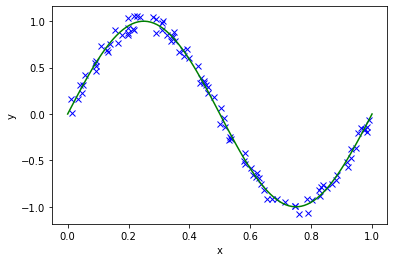

In [ ]:
t = np.linspace(0,1,100)
plt.plot(X,y,'bx')
plt.plot(t, func(t), 'g-')
#plt.xlim(0,1)
#plt.ylim(-1.5,1.5)
#plt.axis([0,1,-1.5,1.5])
plt.xlabel('x')
plt.ylabel('y')

# Linear Regression

**linear regression model** 
\begin{equation}
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \dots + w_n x_n
\end{equation}
In vectorized form
\begin{equation}
\hat{y} = h({\bf x};{\bf w}) = {\bf w}^T \cdot {\bf x} =  {\bf x}^T \cdot {\bf w}
\end{equation}
where
\begin{equation}
{\bf w} = 
\begin{bmatrix}
w_0\\
w_1\\
\vdots\\
w_n
\end{bmatrix}
,~~~~~~{\bf x} = 
\begin{bmatrix}
1\\
x_1\\
\vdots\\
x_n
\end{bmatrix}
\end{equation}
For a dataset with $m$ samples, the input data matrix
\begin{equation}
{\bf X} = 
\begin{bmatrix}
1 & x_{11}& x_{12}& \cdots & x_{1n}\\
1& x_{21}& x_{22}& \cdots& x_{2n}\\
\vdots & \vdots & \vdots & \ddots & \cdots\\
1& x_{m1}& x_{m2}& \cdots& x_{mn}
\end{bmatrix}_{m \times (n+1)}
= 
\begin{bmatrix}
-{\bf x}_1^T-\\
-{\bf x}_2^T-\\
\vdots\\
-{\bf x}_m^T-
\end{bmatrix} =
\begin{bmatrix}
| & | & | & |\\
{\bf x}_{:,0} & {\bf x}_{:,1} & \cdots &  {\bf x}_{:,n}\\
| & | & | & |
\end{bmatrix}
\end{equation}
Prediction
\begin{equation}
\hat{\bf y}_{m \times 1} = {\bf X} \cdot {\bf w}
\end{equation}

Mean square error (MSE) cost function
\begin{equation}
{\rm MSE}(\hat{\bf y}, {\bf y}) = \frac{1}{m} \sum_{i=1}^m (\hat{y}_i - y_i )^2
\end{equation}

For linear regression,
\begin{equation}
{\rm MSE}({\bf w}) = \frac{1}{m} \sum_{i=1}^m ({\bf w}^T \cdot {\bf x}_i - y_i )^2
\end{equation}

**Normal equation** (solution to MSE minimization) $m>n$
\begin{equation}
\hat{\bf w} = \left({\bf X}^T \cdot {\bf X} \right)^{-1} \cdot {\bf X}^T \cdot {\bf y}
\end{equation}
with dimensions  $\hat{\bf w}_{(n+1) \times 1}$, $\left({\bf X}^T \cdot {\bf X} \right)^{-1}_{(n+1)\times (n+1)}$, ${\bf X}^T_{(n+1)\times m}$, ${\bf y}_{m\times 1}$. Matrix inversion is slow when $n$ is large.

Partial derivative of MSE for linear regression
\begin{equation}
\frac{\partial}{\partial w_j}  {\rm MSE}({\bf w}) = \frac{2}{m} \sum_{i=1}^m ({\bf w}^T \cdot {\bf x}_i - y_i ) x_{ij}, ~~~~~~j = 0,1,\cdots, n
\end{equation}
Gradient vector of MSE for linear regression
\begin{equation}
\nabla_{\bf w} {\rm MSE}({\bf w}) = 
\begin{bmatrix}
\frac{\partial}{\partial w_0}  {\rm MSE}({\bf w})\\
\frac{\partial}{\partial w_1}  {\rm MSE}({\bf w})\\
\vdots\\
\frac{\partial}{\partial w_n}  {\rm MSE}({\bf w})
\end{bmatrix}_{(n+1)\times 1} = \frac{2}{m}
\begin{bmatrix}
\sum_{i=1}^m ({\bf w}^T \cdot {\bf x}_i - y_i ) x_{i0}\\
\sum_{i=1}^m ({\bf w}^T \cdot {\bf x}_i - y_i ) x_{i1}\\
\vdots\\
\sum_{i=1}^m ({\bf w}^T \cdot {\bf x}_i - y_i ) x_{in}
\end{bmatrix} =\frac{2}{m}
\begin{bmatrix}
{\bf x}_{:, 0}^T \cdot (\hat{\bf y} - {\bf y} ) \\
{\bf x}_{:, 1}^T \cdot (\hat{\bf y} - {\bf y} )\\
\vdots\\
{\bf x}_{:, n}^T \cdot (\hat{\bf y} - {\bf y} )
\end{bmatrix} =  \frac{2}{m}
\begin{bmatrix}
-{\bf x}_{:, 0}^T-  \\
-{\bf x}_{:, 1}^T- \\
\vdots\\
-{\bf x}_{:, n}^T-  
\end{bmatrix} 
\cdot (\hat{\bf y} - {\bf y} ) \\
= \frac{2}{m} {\bf X}^T \cdot ({\bf X} \cdot {\bf w} - {\bf y} )
\end{equation}

Gradient descent algorithm
\begin{equation}
{\bf w}(t+1) = {\bf w}(t) - \eta \nabla_{\bf w} {\rm MSE}({\bf w}(t))
\end{equation}

**learning rate** $\eta$

**minibatch size** $m=b$ 

**epoch**

**iteration** $t$

**Stochastic Gradient Descent (SGD)** algorithm

```
initialization w(0)
for epoch = 0,1,2,... do:
    for t = 0,1,2,..., int(m/b) do:
        randomly pick b samples (minibatch) from all m samples
        calculate gradient using the minibatch of size b
         w(t+1) = w(t) - rate*gradient
    calculate loss and accuracy
```



In [ ]:
X.shape

(100, 1)

In [ ]:
# generate polynomial features
#X_input = np.column_stack((np.ones(m),X, X**2, X**3)) # data matrix X =[ 1, x, x^2, x^3]
d = 3
X_input = np.ones(m)
for dim in range(1,d+1):
  X_input = np.column_stack((X_input,X**dim))
  
print(X_input.shape)
print(X_input[0])

(100, 4)
[1.         0.2162878  0.04678041 0.01011803]


In [ ]:
#plt.scatter(X_input[:,1],X_input[:,6] )

In [ ]:
# training and testing sets
split = 80
X_train, X_test = X_input[:split,:], X_input[split:,:]
y_train, y_test = y[:split], y[split:]

In [ ]:
# feature scaling to avoid anisotropy
#mu = np.zeros(d+1)
#std = np.zeros(d+1)

  #max = np.max(X_input[:,j])
  #min = np.min(X_input[:,j])
  #X_input[:,j] = (X_input[:,j]-min) / (max-min)

# Standard Scaler
#for j in range(1,d+1): 
#  mu[j] = np.mean(X_train[:,j])
#  std[j] = np.std(X_train[:,j])
#  X_train[:,j] = (X_train[:,j]-mu[j]) / std[j]
#  X_test[:,j] = (X_test[:,j]-mu[j]) / std[j] # note that, need to use training mu and std

In [ ]:
# solution of normal equation
w_opt = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
print('Normal equation:', w_opt.reshape(d+1))

Normal equation: [ -0.19293755  11.76478929 -33.98982003  22.56961726]


In [ ]:
# SGD
eta = 0.1
n_epochs = 100000
train_size = split
batch_size = 10
n_iterations = train_size//batch_size
print(n_iterations, 'iterations per epoch')

#initialization
w = np.random.normal(0, 0.1, size=[d+1,1]) # + w_opt
#w = np.array([-0.2, 11, -34,  23]).reshape(4,1)
#w = w_opt
print('initial weights:', w.reshape(d+1))

train_loss, test_loss = [], []
for epoch in range(n_epochs):
  for i in range(n_iterations): # such that each sample can be selected once on average in one epoch 
    random_indices = np.random.choice(train_size, size=batch_size, replace=False)
    X_batch, y_batch= X_train[random_indices, :], y_train[random_indices]
    #X_batch, y_batch = X_train, y_train

    gradient = 2/batch_size * X_batch.T.dot(X_batch.dot(w) - y_batch)
    w = w - eta*gradient

  mse = np.average((X_train.dot(w) - y_train)**2)
  train_loss.append(mse)
  mse = np.average((X_test.dot(w) - y_test)**2)
  test_loss.append(mse)

  #print(epoch, mse)

print('final weights:', w.reshape(d+1))
print('Normal equation:', w_opt.reshape(d+1))

8 iterations per epoch
initial weights: [-0.14959084  0.12496388 -0.05519389  0.03861069]
final weights: [ -0.18882086  11.766999   -33.99392273  22.55975216]
Normal equation: [ -0.19293755  11.76478929 -33.98982003  22.56961726]


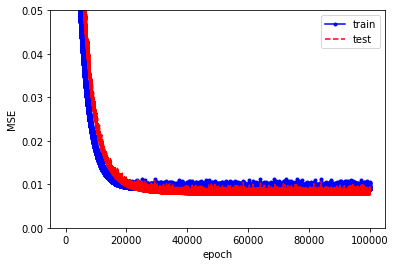

In [ ]:
# training curve
plt.plot(range(n_epochs),train_loss,'b.-', label='train')
plt.plot(range(n_epochs),test_loss,'r--', label='test')
plt.ylim(0,0.05)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.legend()


Text(0, 0.5, 'MSE')

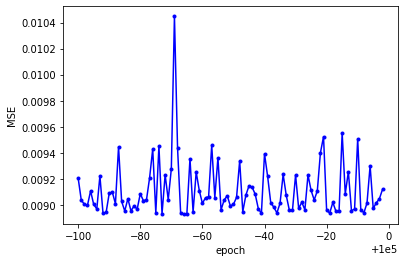

In [ ]:
plt.plot(range(n_epochs)[-100:-1],train_loss[-100:-1],'b.-')
plt.xlabel('epoch')
plt.ylabel('MSE')

In [ ]:
# generate polynomial features for new input t
#X_pred = np.column_stack((np.ones(100),t, t**2, t**3))
X_pred = np.ones(100)
for dim in range(1,d+1):
  X_pred = np.column_stack((X_pred,t**dim))

#for j in range(1,d+1):
#  max = np.max(X_pred[:,j])
#  min = np.min(X_pred[:,j])
#  X_pred[:,j] = (X_pred[:,j]-min) / (max-min)

# Standard Scaler
#for j in range(1,d+1): 
#  X_pred[:,j] = (X_pred[:,j]-mu[j]) / std[j] 

print(X_pred.shape)
y_pred = X_pred.dot(w)
print(y_pred.shape)

(100, 4)
(100, 1)


Text(0, 0.5, 'y')

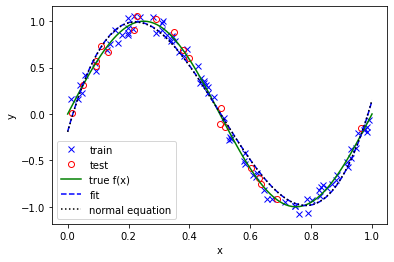

In [ ]:
plt.plot(X[:split],y_train,'bx', label='train')
plt.plot(X[split:],y_test,'ro', label = 'test', markerfacecolor='none')

plt.plot(t, func(t), 'g-',label='true f(x)')
plt.plot(t, y_pred, 'b--',label='fit')
plt.plot(t, X_pred.dot(w_opt), 'k:',label='normal equation')

plt.legend()
#plt.axis([0,1,-1.5,1.5])
plt.xlabel('x')
plt.ylabel('y')

# Linear regression with sklearn

In [ ]:
from sklearn.preprocessing import PolynomialFeatures # to generate x, x^2, x^3, ... features
from sklearn.linear_model import LinearRegression
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [ ]:
d = 3
poly_features = PolynomialFeatures(degree=d, include_bias=False)
X_poly = poly_features.fit_transform(X) # shape (nsamples, degree)
print(X_poly.shape)
print(X[0],X_poly[0])

(100, 3)
[0.2162878] [0.2162878  0.04678041 0.01011803]


In [ ]:
split = 80
#note that, there is no first column with 1's here in X
X_train, X_test = X_poly[:split,:], X_poly[split:,:]
y_train, y_test = y[:split], y[split:]

In [ ]:
model = LinearRegression()

In [ ]:
# training
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# y = a_d*x^d + ... + a^3*x^3 + a^2*x^2 + a_1*x + a_0
# extract coefficients
w = np.concatenate((model.intercept_, model.coef_[0,:]))
print(w, w.shape)

[ -0.19293755  11.76478929 -33.98982003  22.56961726] (4,)


In [ ]:
model.score(X_train,y_train) # R2

0.9813096464613332

In [ ]:
X_pred = poly_features.fit_transform(t.reshape(100,1)) # shape (nsamples, nfeatures)
y_pred = model.predict(X_pred)

Text(0, 0.5, 'y')

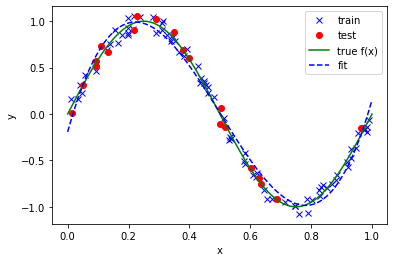

In [ ]:
plt.plot(X_train[:,0],y_train,'bx', label='train')
plt.plot(X_test[:,0],y_test,'ro', label = 'test')
plt.plot(t, func(t), 'g-',label='true f(x)')
plt.plot(t, y_pred, 'b--',label='fit')
plt.legend()
#plt.axis([0,1,-1.5,1.5])
plt.xlabel('x')
plt.ylabel('y')


# Regularization

* ridge $\ell_2$
* LASSO $\ell_1$

For linear regression with Ridge regression,
\begin{equation}
J({\bf w}) =  \frac{1}{m} \sum_{i=1}^m ({\bf w}^T \cdot {\bf x}_i - y_i )^2 + \alpha \frac{1}{2} \sum_{j=1}^n w_j^2 = {\rm MSE}({\bf w}) +  \alpha \frac{1}{2}  ({\bf w}^T \cdot {\bf w} - w_0^2)
\end{equation}

Gradient vector
\begin{equation}
\nabla_{\bf w} J({\bf w}) = \nabla_{\bf w} {\rm MSE}({\bf w})  + \alpha {\bf w}  - \alpha 
\begin{bmatrix}
w_0\\
0\\
\vdots\\
0
\end{bmatrix}
= \frac{2}{m} {\bf X}^T \cdot ({\bf X} \cdot {\bf w} - {\bf y} ) + \alpha {\bf w}  - \alpha 
\begin{bmatrix}
w_0\\
0\\
\vdots\\
0
\end{bmatrix}
\end{equation}

**Normal equation** with regularization
\begin{equation}
\hat{\bf w} = \left({\bf X}^T \cdot {\bf X} + \alpha {\bf A} \right)^{-1} \cdot {\bf X}^T \cdot {\bf y}
\end{equation}


Gradient descent algorithm with regularization -- **weight decay**
\begin{equation}
{\bf w}(t+1) = {\bf w}(t) - \eta \nabla_{\bf w} {\rm MSE}({\bf w}(t)) - \eta\alpha {\bf w}(t)
\end{equation}

In [ ]:
m = 10 # number of samples
dy = 1 # noise level
X = np.random.rand(m,1) # N inputs uniformly distributed in [0,1]
y = func(X) + dy*(np.random.rand(m,1)-0.5)

In [ ]:
# generate polynomial features
d=5
#X_input = np.column_stack((np.ones(m),X, X**2, X**3,X**4,X**5,X**6)) # data matrix X =[ 1, x, x^2, x^3]
X_input = np.ones(m)
for dim in range(1,d+1):
  X_input = np.column_stack((X_input,X**dim))
print(X_input.shape)
print(X_input[0])

(10, 6)
[1.00000000e+00 2.19740293e-01 4.82857962e-02 1.06103350e-02
 2.33151812e-03 5.12328473e-04]


In [ ]:
# training and testing sets
split = 5
X_train, X_test = X_input[:split,:], X_input[split:,:]
y_train, y_test = y[:split], y[split:]

In [ ]:
A = np.identity(d+1)
A[0,0] = 0
A

array([[0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
np.linalg.inv(X_train.T.dot(X_train))

array([[ 6.21226939e+11, -6.12676404e+12,  2.14774754e+13,
        -3.49411026e+13,  2.69526678e+13, -7.98481656e+12],
       [-6.12676404e+12,  6.04243558e+13, -2.11818606e+14,
         3.44601750e+14, -2.65816927e+14,  7.87491397e+13],
       [ 2.14774754e+13, -2.11818606e+14,  7.42533722e+14,
        -1.20800729e+15,  9.31825754e+14, -2.76056447e+14],
       [-3.49411026e+13,  3.44601750e+14, -1.20800729e+15,
         1.96527319e+15, -1.51596119e+15,  4.49108494e+14],
       [ 2.69526678e+13, -2.65816927e+14,  9.31825754e+14,
        -1.51596119e+15,  1.16937347e+15, -3.46430741e+14],
       [-7.98481656e+12,  7.87491396e+13, -2.76056447e+14,
         4.49108494e+14, -3.46430741e+14,  1.02631247e+14]])

In [ ]:
# solution of normal equation
# may not find the solution or get inaccurate result due to overflow
alpha = 0.00
w_opt = np.linalg.inv(X_train.T.dot(X_train) + alpha*A).dot(X_train.T).dot(y_train)
print('Normal equation:', w_opt.reshape(d+1))

Normal equation: [  -7.50153913   51.83128621  -51.2227156  -157.09098348  296.13605357
 -131.76315434]


In [ ]:
# SGD with regularization
alpha = 0.0001
#eta = 0.1
eta = np.array([0.1,0.1,0.2,0.3,0.5,0.9]).reshape(d+1,1) # anisotropic rate
n_epochs = 1000000
train_size = split
batch_size = train_size
n_iterations = train_size//batch_size
print(n_iterations, 'iterations per epoch')

#initialization
w = np.random.normal(0, 0.1, size=[d+1,1]) # + w_opt
#w = np.array([-0.2, 11, -34,  23]).reshape(4,1)
#w = w_opt
print('initial weights:', w.reshape(d+1))

train_loss, test_loss = [], []
for epoch in range(n_epochs):
  for i in range(n_iterations): # such that each sample can be selected once on average in one epoch 
    random_indices = np.random.choice(train_size, size=batch_size, replace=False)
    X_batch, y_batch= X_train[random_indices, :], y_train[random_indices]
    #X_batch, y_batch = X_train, y_train

    # no regularization on w_0
    gradient = 2/batch_size * X_batch.T.dot(X_batch.dot(w) - y_batch) + alpha*np.concatenate(([[0]],w[1:])) 
    #print(gradient.reshape(d+1))
    #eta = 5 /(epoch*10 + i +50) # learning schedule
    w = w - eta*gradient

  mse = np.average((X_train.dot(w) - y_train)**2)
  train_loss.append(mse)
  mse = np.average((X_test.dot(w) - y_test)**2)
  test_loss.append(mse)

  #print(epoch, mse)

print('final weights:', w.reshape(d+1))
print('Normal equation:', w_opt.reshape(d+1))

1 iterations per epoch
initial weights: [ 0.04098466 -0.07813872  0.10270158 -0.03044244  0.15299994 -0.05628835]
final weights: [ 0.19492653  3.62082028 -6.93209129 -5.61338684  1.36266162  7.73938367]
Normal equation: [  -7.50153913   51.83128621  -51.2227156  -157.09098348  296.13605357
 -131.76315434]


In [ ]:
# generate polynomial features for new input t
#X_pred = np.column_stack((np.ones(100),t, t**2, t**3))
#X_pred = np.column_stack((np.ones(100),t, t**2, t**3,t**4,t**5,t**6))
t = np.linspace(0,1,100).reshape(100,1)
X_pred = np.ones(100)
for dim in range(1,d+1):
  X_pred = np.column_stack((X_pred,t**dim))

print(X_pred.shape)
y_pred = X_pred.dot(w)
print(y_pred.shape)

(100, 6)
(100, 1)


Text(0, 0.5, 'y')

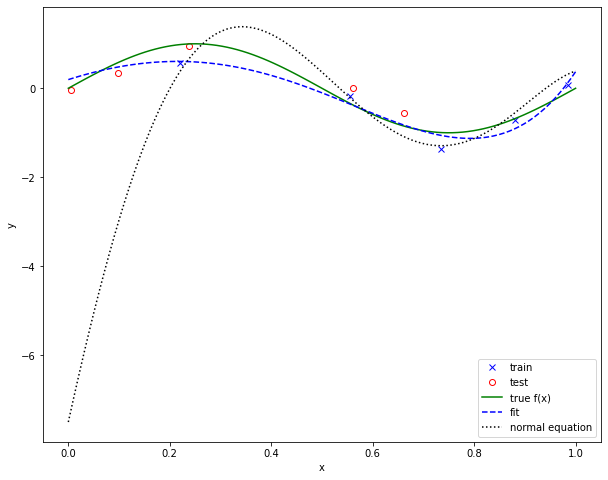

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(X_train[:,1],y_train,'bx', label='train')
plt.plot(X_test[:,1],y_test,'ro', label = 'test', markerfacecolor='none')

plt.plot(t, func(t), 'g-',label='true f(x)')
plt.plot(t, y_pred, 'b--',label='fit')
plt.plot(t, X_pred.dot(w_opt), 'k:',label='normal equation')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

# Regularization in sklearn

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
from sklearn.linear_model import Ridge

In [ ]:
model1 = Ridge(alpha=0.0001) #(alpha=0.00001, solver = 'cholesky')

In [ ]:
model1.fit(X_train[:,1:], y_train) # exclude the first column of 1's

Ridge(alpha=0.0001)

In [ ]:
y_pred = model1.predict(X_pred[:,1:])

Text(0, 0.5, 'y')

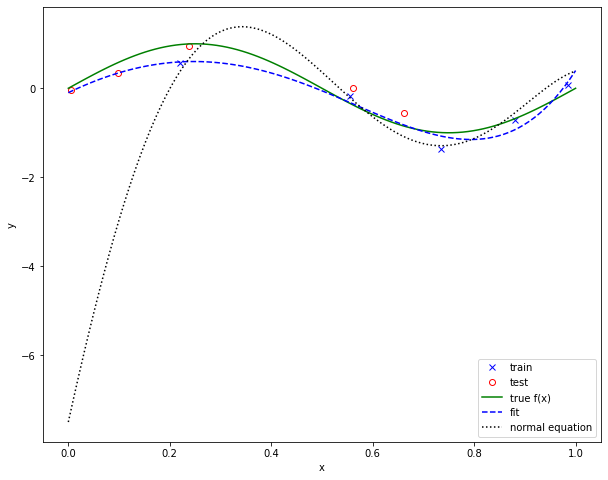

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(X_train[:,1],y_train,'bx', label='train')
plt.plot(X_test[:,1],y_test,'ro', label = 'test', markerfacecolor='none')

plt.plot(t, func(t), 'g-',label='true f(x)')
plt.plot(t, y_pred, 'b--',label='fit')
plt.plot(t, X_pred.dot(w_opt), 'k:',label='normal equation')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
model1.intercept_, model1.coef_

(array([-0.09906646]),
 array([[ 5.48650236, -9.58699294, -5.8925896 ,  3.35979224,  7.12978567]]))

In [ ]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html
from sklearn.linear_model import SGDRegressor

In [ ]:
model2 = SGDRegressor(max_iter = 1000000, eta0=1, learning_rate = 'constant', tol = None, penalty='l2', alpha=0.0000)

In [ ]:
model2.fit(X_train[:,1:], y_train.ravel())

SGDRegressor(alpha=0.0, eta0=1, learning_rate='constant', max_iter=1000000,
             tol=None)

In [ ]:
y_pred = model2.predict(X_pred[:,1:])

Text(0, 0.5, 'y')

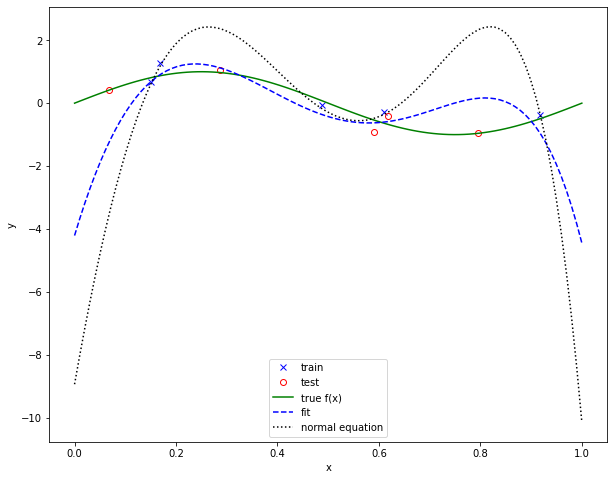

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(X_train[:,1],y_train,'bx', label='train')
plt.plot(X_test[:,1],y_test,'ro', label = 'test', markerfacecolor='none')

plt.plot(t, func(t), 'g-',label='true f(x)')
plt.plot(t, y_pred, 'b--',label='fit')
plt.plot(t, X_pred.dot(w_opt), 'k:',label='normal equation')

plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
model2.intercept_, model2.coef_

(array([-7.44326726e+11]),
 array([ 1.10042977e+13, -4.83831362e+13,  5.01059557e+13,  3.63138201e+13,
        -5.13639279e+13]))

In [ ]:
model2.n_features_in_

5